# Fernando Alonso

<img src="https://www.formula1.com/content/fom-website/en/drivers/fernando-alonso/_jcr_content/image.img.1920.medium.jpg/1641808424475.jpg" width="300">

### Team: Alpine

<img src ="https://www.formula1.com/content/fom-website/en/drivers/fernando-alonso/_jcr_content/helmet.img.png/1617101187829.png" width="200">


In [1]:
library (tidyverse)
library (tidymodels)
source("source/master_functions.r")
source("source/regression.r")
source("source/prediction.r")
set.seed(620)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.7
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

Warning message:
“package ‘tidyr’ was built under R version 4.1.2”
Warning message:
“package ‘readr’ was built under R version 4.1.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Registered S3 method overwritten by 'tune':
  method                   from   
  required_pkgs.model_spec parsnip

── Attaching packages ────────────────────────────────────── tidymodels 0.1.3 ──

✔ broom        0.7.12     ✔ rsample      0.1.1 
✔ dials        0.1.0      ✔ tune         0.1.6 
✔ infer        1.0.0      ✔ workflows    0.2.4 
✔ modeldata    0.1.1      ✔ workflowsets 0.1.0 
✔ parsnip      0.1.7      ✔ yardstick    0.0.9 
✔ recipes      0.1.17     

Warning message

In [2]:
initialize_master()

Rows: 79 Columns: 9

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (6): circuitRef, name, location, country, alt, url
dbl (3): circuitId, lat, lng


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

Rows: 12716 Columns: 7

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): positionText
dbl (6): constructorStandingsId, raceId, constructorId, points, position, wins


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

Rows: 11950 Columns: 5

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): status
dbl (4): constructorResultsId, raceId, constructorId, points


ℹ Use `spec()` to retrieve the full column specification for this

In [3]:
# Filtering Lap Data For 2022 Drivers

lap_data <- lap_times %>%
            filter(driverId %in% driver_ids) %>%
            filter(raceId %in% race_ids)

# Filtering Lap Data For Individual Driver

alo_laps <- lap_data %>%
            filter(driverId == 4)

# Season Analysis

In [4]:
rmse_col <- data.frame(.metric = character(), .estimator = character(), .estimate = double(), Round = double(), stringsAsFactors=FALSE) 

racetime_col <- data.frame(race_time_milliseconds = double(), race_time_mins = double(), race_time_hrs = double()) 

rmse_col

racetime_col

.metric,.estimator,.estimate,Round
<chr>,<chr>,<dbl>,<dbl>


race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>


raceId,n
<dbl>,<int>
4,57
20,57
38,57
53,57
73,57
92,57
863,57
883,57
902,57


`geom_smooth()` using formula 'y ~ x'



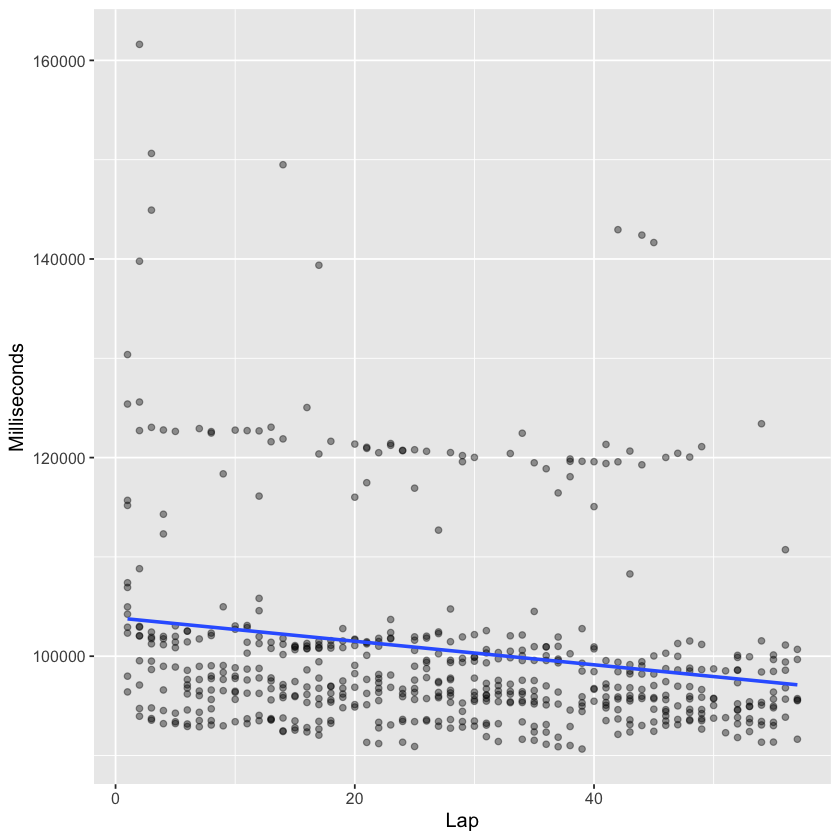

In [5]:
set.seed(2022)

#1. BAHRAIN 

fa_bahrain <- alo_laps %>%
                filter(raceId %in% bahrain_race_ID) 

fa_bahrain_clean <- fa_bahrain %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n))
fa_bahrain_clean
fa_bahrain_clean_ID <- fa_bahrain_clean %>%
                        pull(raceId)


### SPLITTING DATA

fa_bahrain_races <- alo_laps %>%
                    filter(raceId %in% fa_bahrain_clean_ID)

formulaone_split <- initial_split(fa_bahrain_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 1

initiate_rmse() 

### GETS PREDICTION

get_bahrain_prediction()

raceId,n
<dbl>,<int>
1054,66


Warning message:
“The number of observations in each quantile is below the recommended threshold of 20.
* Stratification will use 3 breaks instead.”
`geom_smooth()` using formula 'y ~ x'



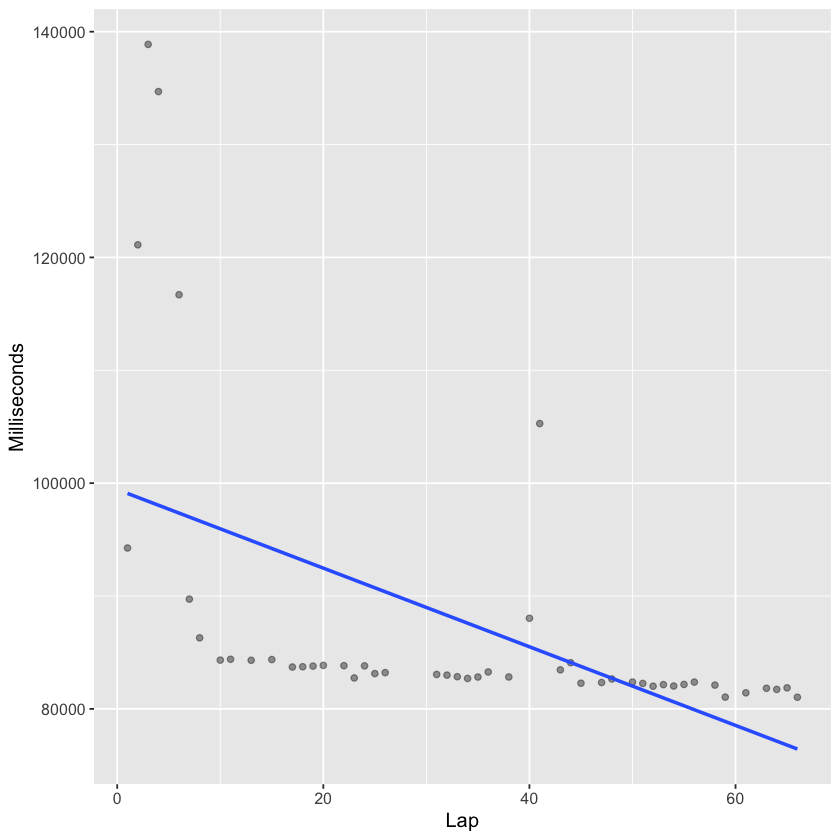

In [6]:
set.seed(2022)

#2. Portimão

fa_Portimão <- alo_laps %>%
                filter(raceId %in% Portimão_race_ID) 

fa_Portimão_faean <- fa_Portimão %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
fa_Portimão_faean
fa_Portimão_faean_ID <- fa_Portimão_faean %>%
                        pull(raceId)


### SPLITTING DATA

fa_Portimão_races <- alo_laps %>%
                    filter(raceId %in% fa_Portimão_faean_ID)

formulaone_split <- initial_split(fa_Portimão_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 2

initiate_rmse() 

### GETS PREDICTION

get_Portimão_prediction()

raceId,n
<dbl>,<int>
1,58
18,58
36,58
90,58
108,58
338,58
841,58
860,58
880,58


`geom_smooth()` using formula 'y ~ x'



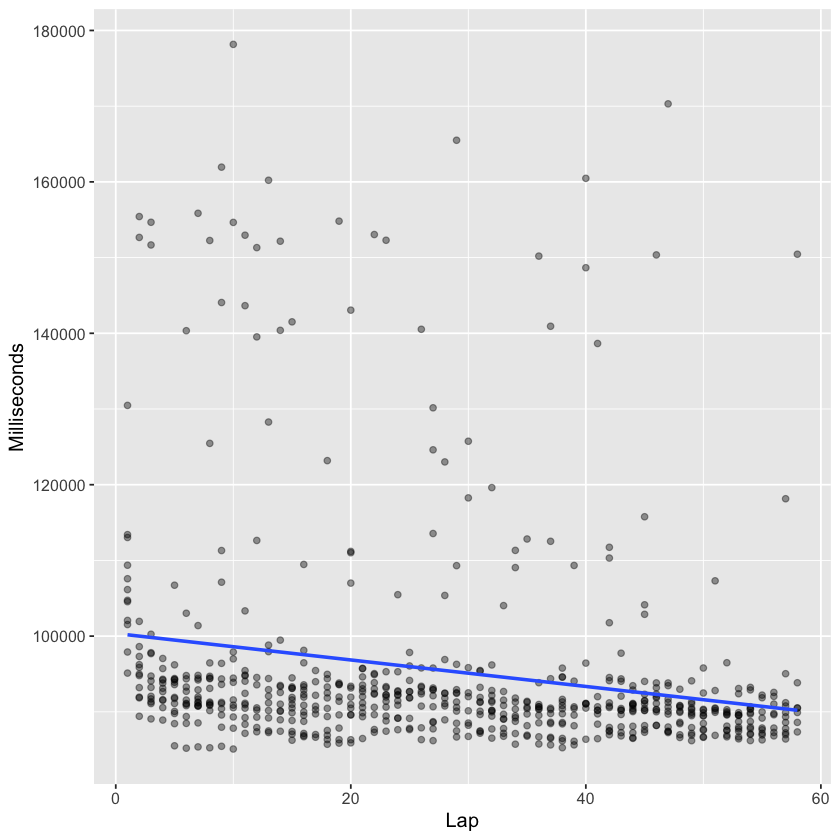

In [7]:
set.seed(2022)

#3. Australia

fa_aus <- alo_laps %>%
                filter(raceId %in% aus_race_ID) 

fa_aus_clean <- fa_aus %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
fa_aus_clean
fa_aus_clean_ID <- fa_aus_clean %>%
                        pull(raceId)


### SPLITTING DATA

fa_aus_races <- alo_laps %>%
                    filter(raceId %in% fa_aus_clean_ID)

formulaone_split <- initial_split(fa_aus_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 3

initiate_rmse() 

### GETS PREDICTION

get_australia_prediction()

raceId,n
<dbl>,<int>
1053,63
56,62
74,62
93,62
111,62
144,5


`geom_smooth()` using formula 'y ~ x'



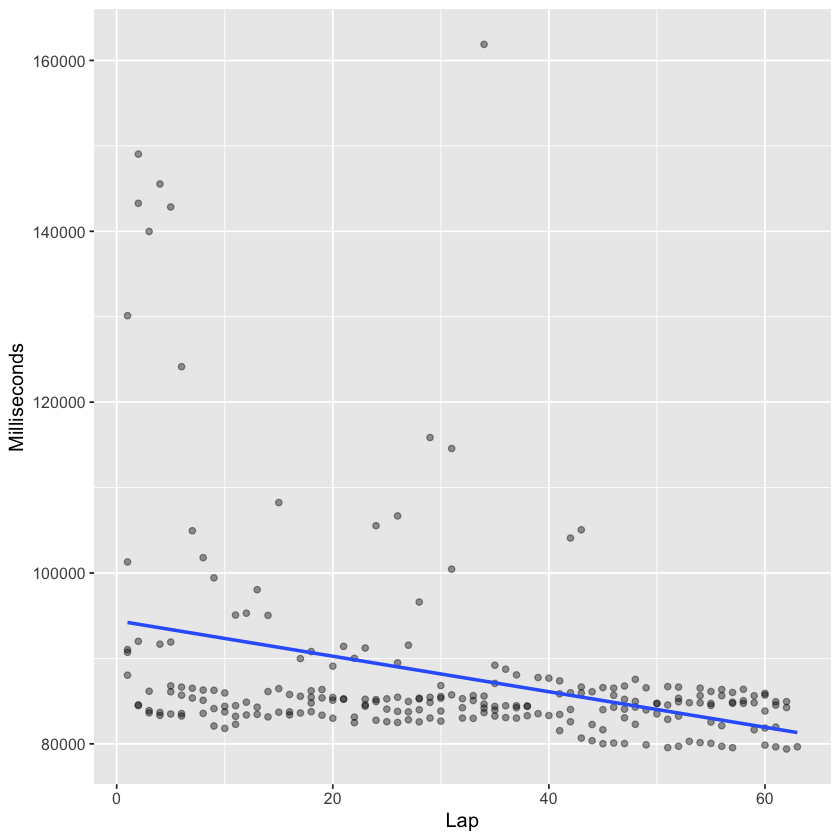

In [8]:
set.seed(2022)

#4. Italy, Imola

fa_imola <- alo_laps %>%
                filter(raceId %in% imola_race_ID) 

fa_imola_clean <- fa_imola %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
fa_imola_clean
fa_imola_clean_ID <- fa_imola_clean %>%
                        pull(raceId)


### SPLITTING DATA

fa_imola_races <- alo_laps %>%
                    filter(raceId %in% fa_imola_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(2:1000)

formulaone_split <- initial_split(fa_imola_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 4

initiate_rmse() 

### GETS PREDICTION

get_imola_prediction()

raceId,n
<dbl>,<int>
7,58
22,58
47,58
66,58
84,58
343,58
844,58
1067,57


`geom_smooth()` using formula 'y ~ x'



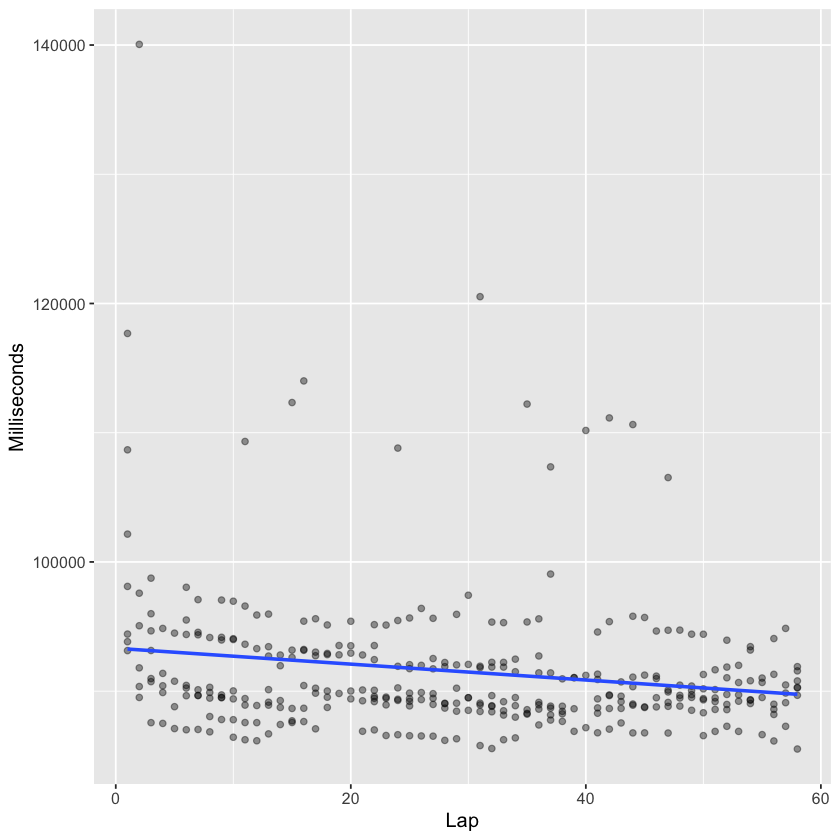

In [9]:
set.seed(2022)

#5. Turkey (Replacing Miami)

fa_turkey <- alo_laps %>%
                filter(raceId %in% turkey_race_ID) 

fa_turkey_clean <- fa_turkey %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
fa_turkey_clean
fa_turkey_clean_ID <- fa_turkey_clean %>%
                        pull(raceId)


### SPLITTING DATA

fa_turkey_races <- alo_laps %>%
                    filter(raceId %in% fa_turkey_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(2:1000)

formulaone_split <- initial_split(fa_turkey_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 5

initiate_rmse() 

### GETS PREDICTION

get_miami_prediction()

raceId,n
<dbl>,<int>
5,66
58,66
75,66
94,66
341,66
864,66
884,66
904,66
39,65


`geom_smooth()` using formula 'y ~ x'



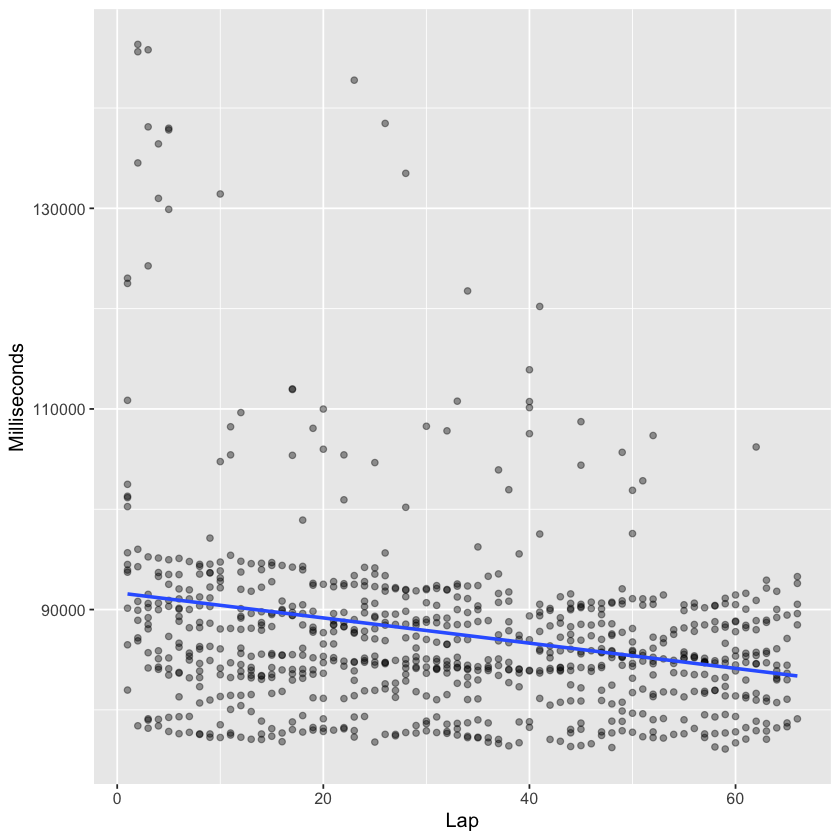

In [10]:
set.seed(2022)

#6.  Spain

fa_spain <- alo_laps %>%
                filter(raceId %in% spain_race_ID) 

fa_spain_clean <- fa_spain %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
fa_spain_clean
fa_spain_clean_ID <- fa_spain_clean %>%
                        pull(raceId)


### SPLITTING DATA

fa_spain_races <- alo_laps %>%
                    filter(raceId %in% fa_spain_clean_ID)

formulaone_split <- initial_split(fa_spain_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 6

initiate_rmse() 

### GETS PREDICTION

get_spain_prediction()

raceId,n
<dbl>,<int>
6,78
40,78
59,78
76,78
114,78
342,78
846,78
865,78
885,78


`geom_smooth()` using formula 'y ~ x'



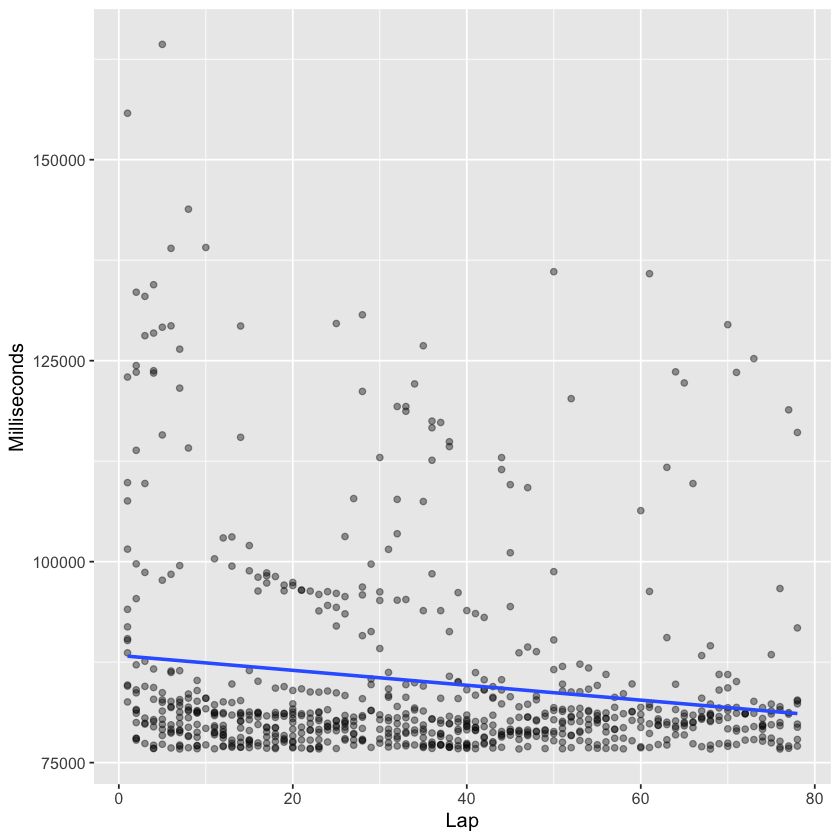

In [11]:
set.seed(2022)

#7. Monaco

fa_monaco <- alo_laps %>%
                filter(raceId %in% monaco_race_ID) 

fa_monaco_clean <- fa_monaco %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
fa_monaco_clean
fa_monaco_clean_ID <- fa_monaco_clean %>%
                        pull(raceId)


### SPLITTING DATA

fa_monaco_races <- alo_laps %>%
                    filter(raceId %in% fa_monaco_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(3:1000)

formulaone_split <- initial_split(fa_monaco_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 7

initiate_rmse() 

### GETS PREDICTION

get_monaco_prediction()

raceId,n
<dbl>,<int>
976,51
992,51
1057,51
955,42


`geom_smooth()` using formula 'y ~ x'



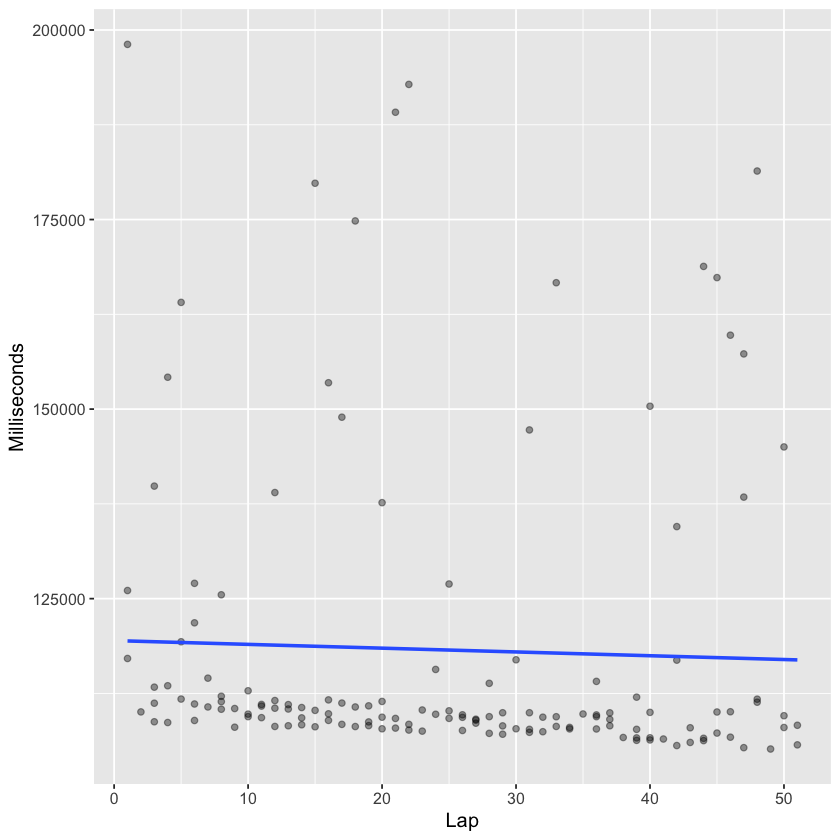

In [12]:
set.seed(2022)

#8.  Azerbaijan

fa_azerbaijan <- alo_laps %>%
                filter(raceId %in% azerbaijan_race_ID) 

fa_azerbaijan_clean <- fa_azerbaijan %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
fa_azerbaijan_clean
fa_azerbaijan_clean_ID <- fa_azerbaijan_clean %>%
                        pull(raceId) 


### SPLITTING DATA

fa_azerbaijan_races <- alo_laps %>%
                    filter(raceId %in% fa_azerbaijan_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(3:1000)

formulaone_split <- initial_split(fa_azerbaijan_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 8

initiate_rmse() 

### GETS PREDICTION

get_azerbaijan_prediction()

raceId,n
<dbl>,<int>
41,70
61,70
115,70
344,70
866,70
886,70
906,70
954,69
975,66


`geom_smooth()` using formula 'y ~ x'



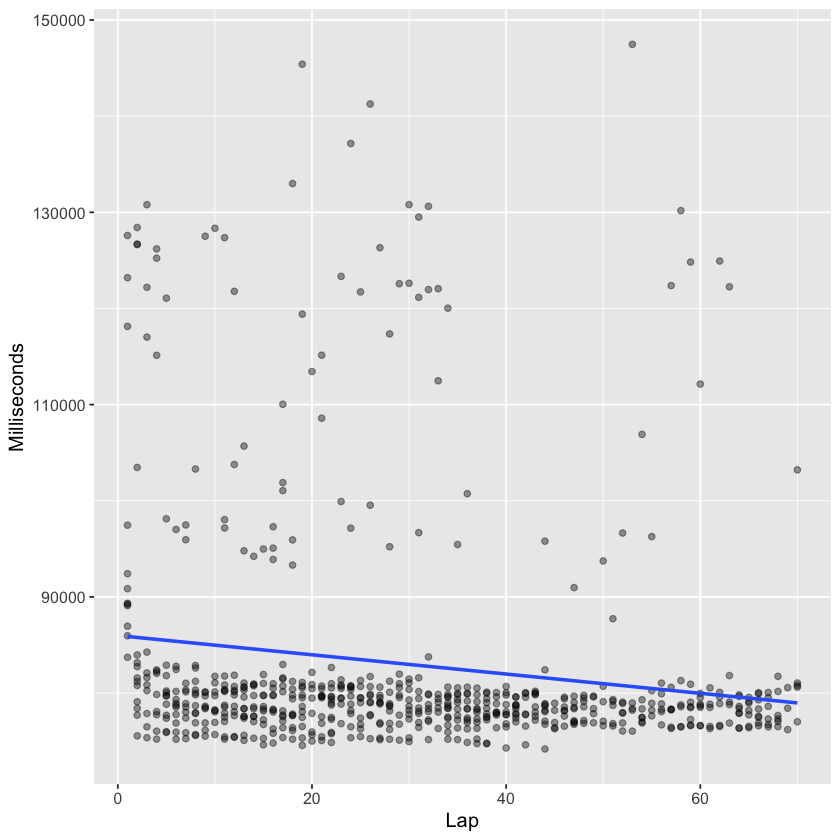

In [13]:
set.seed(2022)

#9. Canada

fa_canada <- alo_laps %>%
                filter(raceId %in% canada_race_ID) 

fa_canada_clean <- fa_canada %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
fa_canada_clean
fa_canada_clean_ID <- fa_canada_clean %>%
                        pull(raceId)


### SPLITTING DATA

fa_canada_races <- alo_laps %>%
                    filter(raceId %in% fa_canada_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(2:1000)

formulaone_split <- initial_split(fa_canada_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 9

initiate_rmse() 

### GETS PREDICTION

get_canada_prediction()

`geom_smooth()` using formula 'y ~ x'



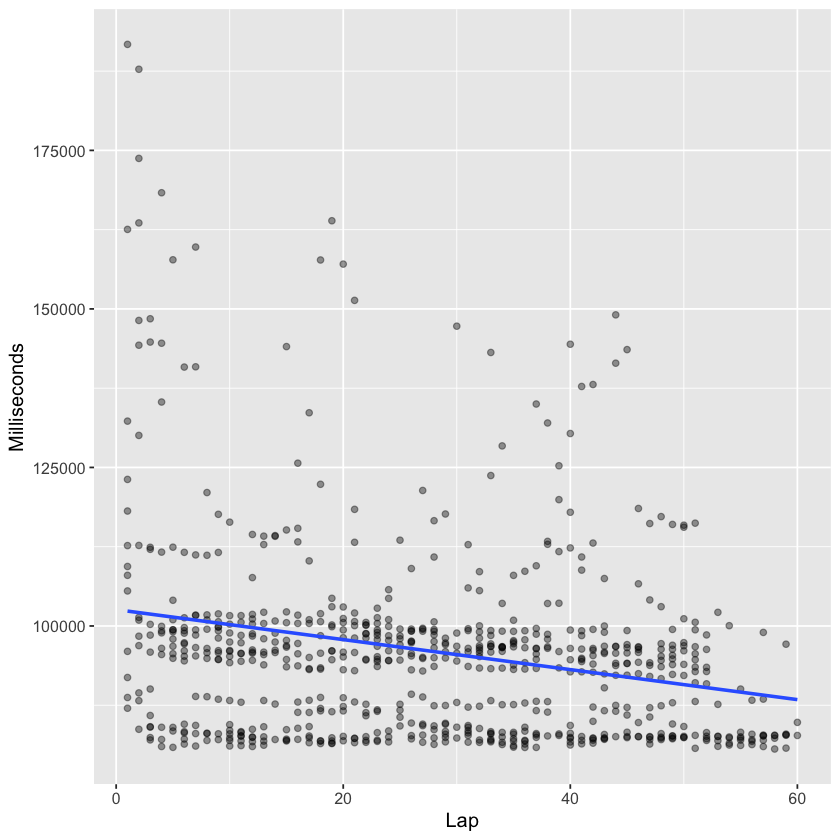

In [14]:
set.seed(2022)

#10. Great Britain

fa_uk <- alo_laps %>%
                filter(raceId %in% uk_race_ID) 

fa_uk_clean <- fa_uk %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 

fa_uk_clean_ID <- fa_uk_clean %>%
                        pull(raceId)


### SPLITTING DATA

fa_uk_races <- alo_laps %>%
                    filter(raceId %in% fa_uk_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(3:1000)

formulaone_split <- initial_split(fa_uk_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 10

initiate_rmse() 

### GETS PREDICTION

get_uk_prediction()

`geom_smooth()` using formula 'y ~ x'



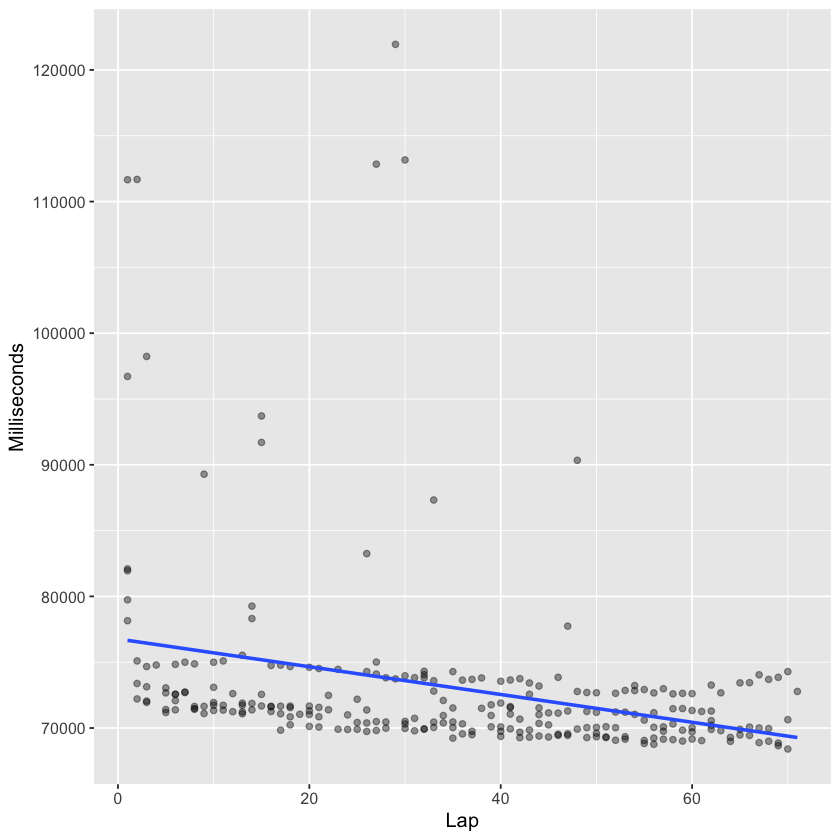

In [15]:
set.seed(2022)

#11. Austria

fa_austria <- alo_laps %>%
                filter(raceId %in% austria_race_ID) 

fa_austria_clean <- fa_austria %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 

fa_austria_clean_ID <- fa_austria_clean %>%
                        pull(raceId)


### SPLITTING DATA

fa_austria_races <- alo_laps %>%
                    filter(raceId %in% fa_austria_clean_ID)

formulaone_split <- initial_split(fa_austria_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 11

initiate_rmse() 

### GETS PREDICTION

get_austria_prediction()

raceId,n
<dbl>,<int>
1059,53
996,50


`geom_smooth()` using formula 'y ~ x'



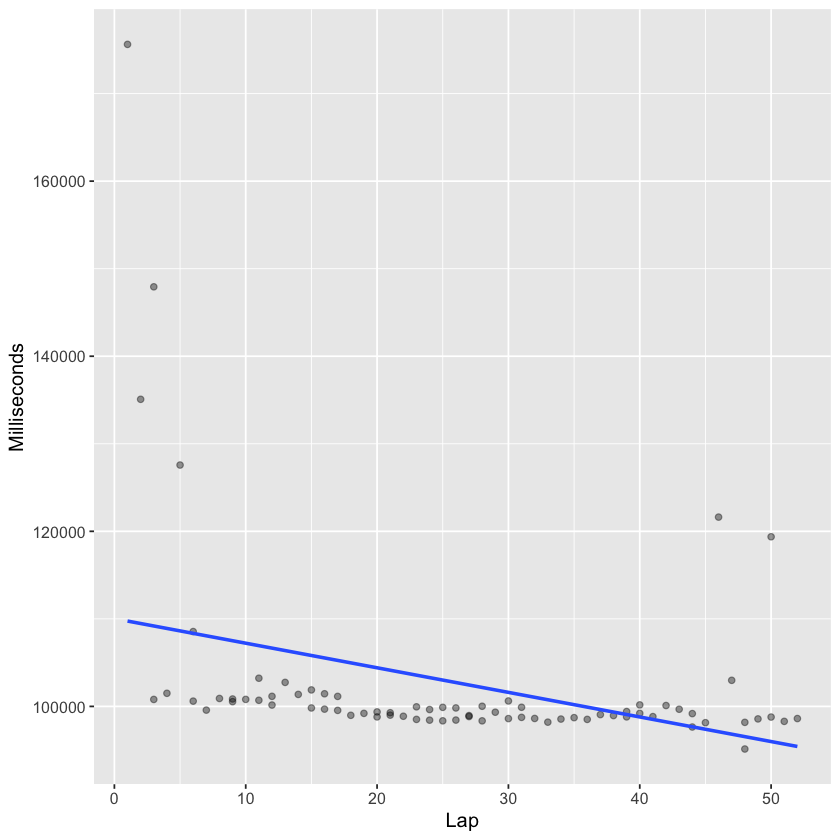

In [16]:
set.seed(2022)

#12.  France

fa_france <- alo_laps %>%
                filter(raceId %in% france_race_ID) 

fa_france_clean <- fa_france %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
fa_france_clean
fa_france_clean_ID <- fa_france_clean %>%
                        pull(raceId)


### SPLITTING DATA

fa_france_races <- alo_laps %>%
                    filter(raceId %in% fa_france_clean_ID)

formulaone_split <- initial_split(fa_france_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 12

initiate_rmse() 

### GETS PREDICTION

get_france_prediction()

`geom_smooth()` using formula 'y ~ x'



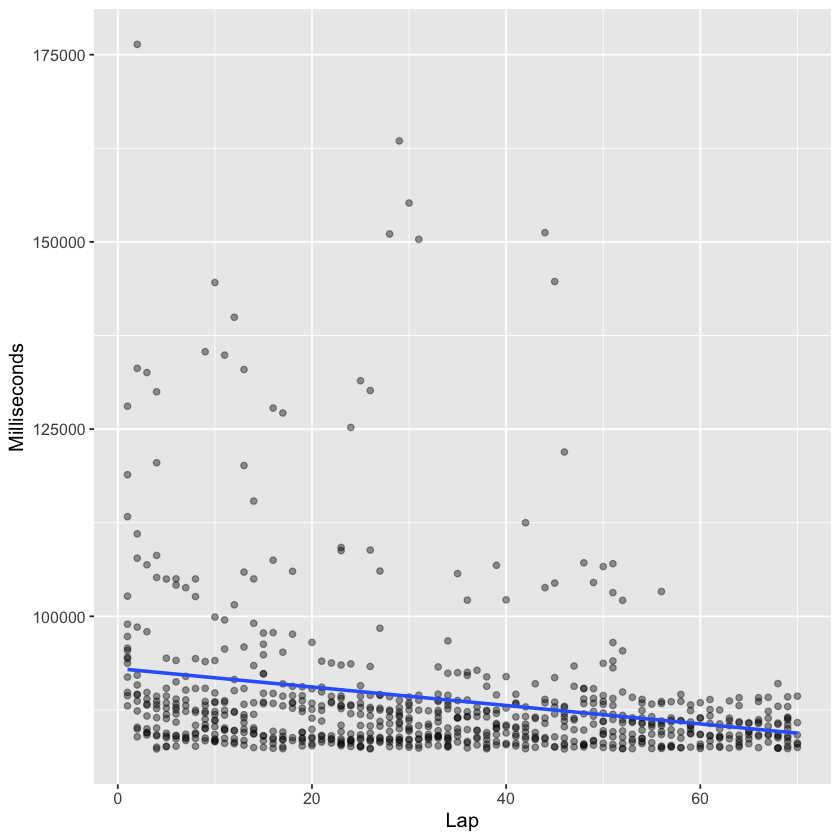

In [17]:
set.seed(2022)

#13.  Hungary

fa_hungary <- alo_laps %>%
                filter(raceId %in% hungary_race_ID) 

fa_hungary_clean <- fa_hungary %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
                     

fa_hungary_clean_ID <- fa_hungary_clean %>%
                        pull(raceId)


### SPLITTING DATA

fa_hungary_races <- alo_laps %>%
                    filter(raceId %in% fa_hungary_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(2:1000)

formulaone_split <- initial_split(fa_hungary_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 13

initiate_rmse() 

### GETS PREDICTION

get_hungary_prediction()

raceId,n
<dbl>,<int>
30,44
49,44
86,44
852,44
891,44
911,44
960,44
937,42
349,37


`geom_smooth()` using formula 'y ~ x'



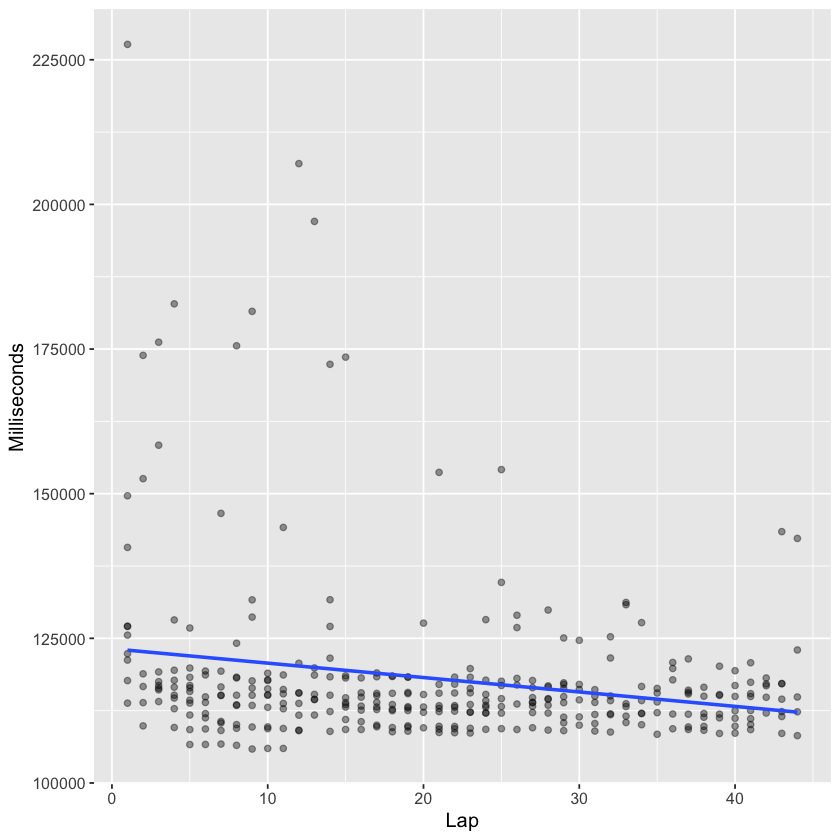

In [18]:
set.seed(2022)

#14. Belgium

fa_belgium <- alo_laps %>%
                filter(raceId %in% belgium_race_ID) 

fa_belgium_clean <- fa_belgium %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
fa_belgium_clean
fa_belgium_clean_ID <- fa_belgium_clean %>%
                        pull(raceId)


### SPLITTING DATA

fa_belgium_races <- alo_laps %>%
                    filter(raceId %in% fa_belgium_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(2:1000)

formulaone_split <- initial_split(fa_belgium_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression() 

round_n <- 14

initiate_rmse() 

### GETS PREDICTION

get_belgium_prediction()

raceId,n
<dbl>,<int>
1064,71


Warning message:
“The number of observations in each quantile is below the recommended threshold of 20.
* Stratification will use 3 breaks instead.”
`geom_smooth()` using formula 'y ~ x'



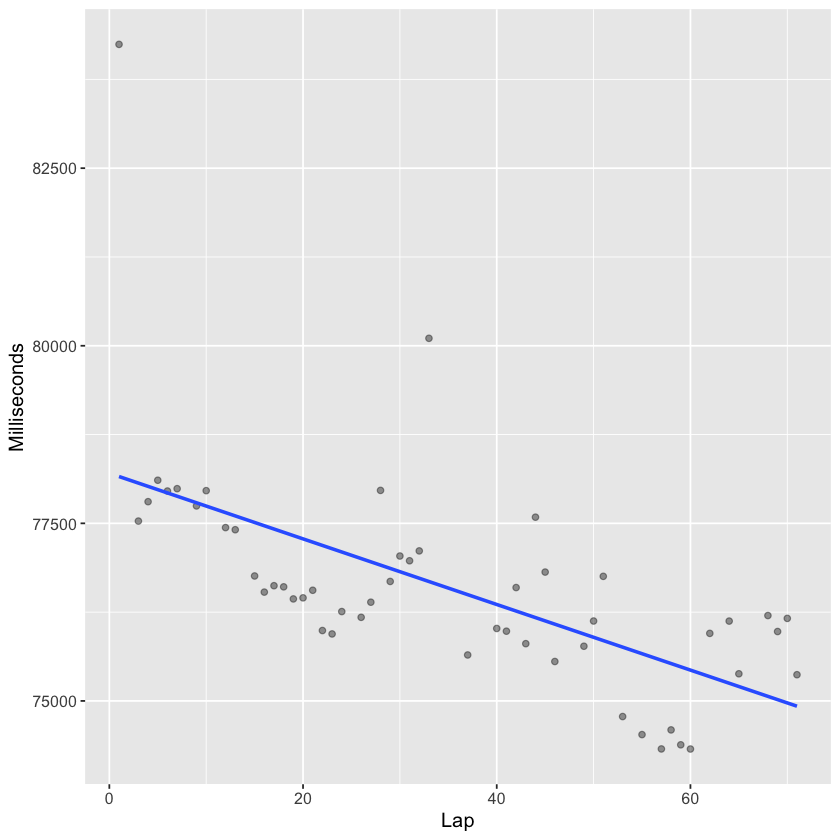

In [19]:
set.seed(2022)

#15.  Netherlands

fa_netherlands <- alo_laps %>%
                filter(raceId %in% netherlands_race_ID) 

fa_netherlands_clean <- fa_netherlands %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
fa_netherlands_clean
fa_netherlands_clean_ID <- fa_netherlands_clean %>%
                        pull(raceId)


### SPLITTING DATA

fa_netherlands_races <- alo_laps %>%
                    filter(raceId %in% fa_netherlands_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(2:1000)

formulaone_split <- initial_split(fa_netherlands_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 15

initiate_rmse() 

### GETS PREDICTION

get_netherlands_prediction()

raceId,n
<dbl>,<int>
13,53
31,53
48,53
85,53
350,53
853,53
872,53
892,53
1065,53


`geom_smooth()` using formula 'y ~ x'



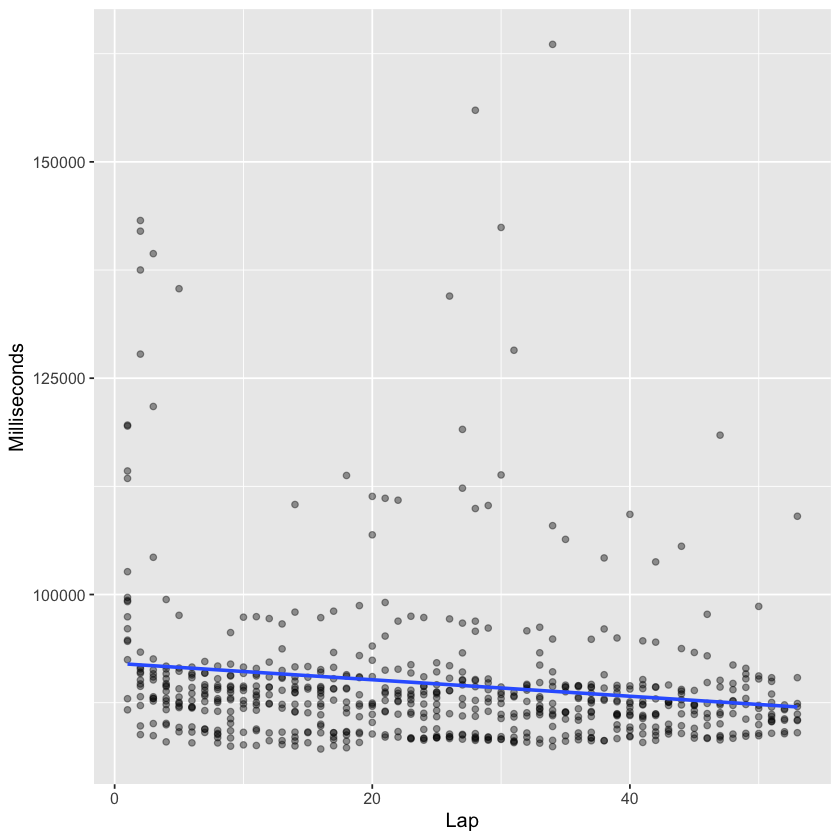

In [20]:
set.seed(2022)

#16. Italy, Monza

fa_monza <- alo_laps %>%
                filter(raceId %in% monza_race_ID) 

fa_monza_clean <- fa_monza %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n))
fa_monza_clean
fa_monza_clean_ID <- fa_monza_clean %>%
                        pull(raceId)


### SPLITTING DATA

fa_monza_races <- alo_laps %>%
                    filter(raceId %in% fa_monza_clean_ID)

formulaone_split <- initial_split(fa_monza_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 16

initiate_rmse() 

### GETS PREDICTION

get_monza_prediction()

`geom_smooth()` using formula 'y ~ x'



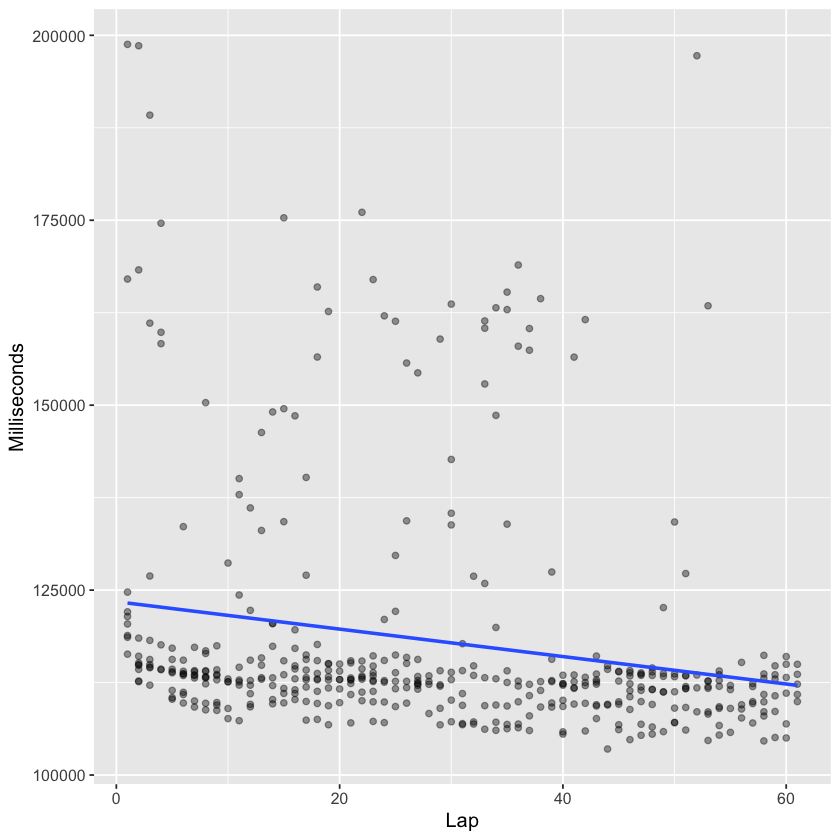

In [21]:
set.seed(2022)

#17. Singapore

fa_singapore <- alo_laps %>%
                filter(raceId %in% singapore_race_ID) 

fa_singapore_clean <- fa_singapore %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 

fa_singapore_clean_ID <- fa_singapore_clean %>%
                        pull(raceId)


### SPLITTING DATA

fa_singapore_races <- alo_laps %>%
                    filter(raceId %in% fa_singapore_clean_ID)

formulaone_split <- initial_split(fa_singapore_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 17

initiate_rmse() 

### GETS PREDICTION

get_singapore_prediction()

`geom_smooth()` using formula 'y ~ x'



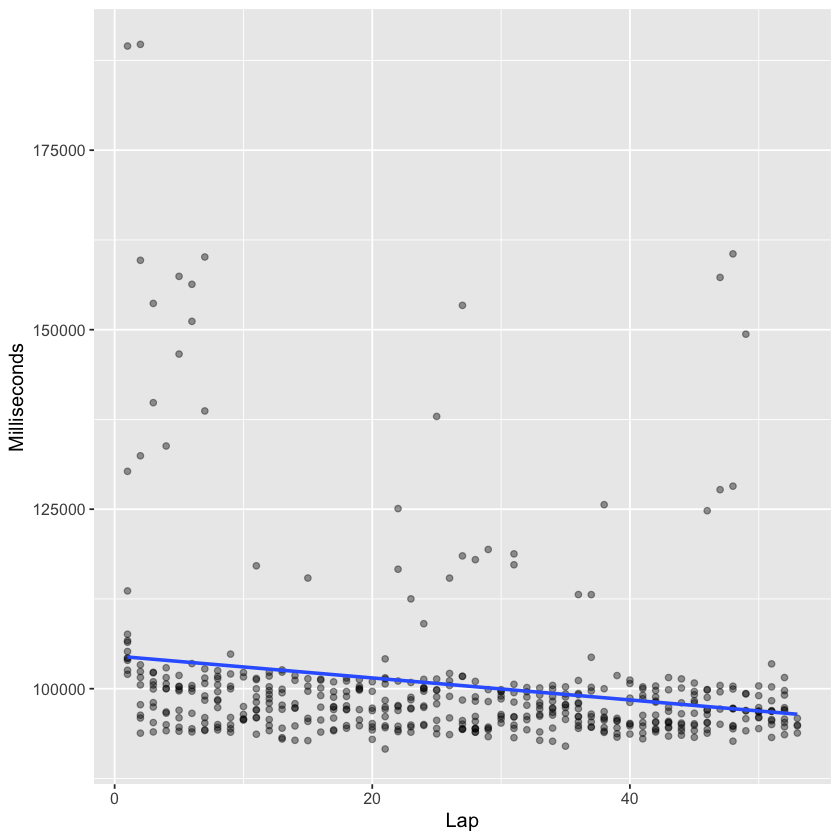

In [22]:
set.seed(2022)

#18. Japan

fa_japan <- alo_laps %>%
                filter(raceId %in% japan_race_ID) 

fa_japan_clean <- fa_japan %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
fa_japan_clean_ID <- fa_japan_clean %>%
                        pull(raceId)


### SPLITTING DATA

fa_japan_races <- alo_laps %>%
                    filter(raceId %in% fa_japan_clean_ID)

formulaone_split <- initial_split(fa_japan_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 18

initiate_rmse() 

### GETS PREDICTION

get_japan_prediction()

`geom_smooth()` using formula 'y ~ x'



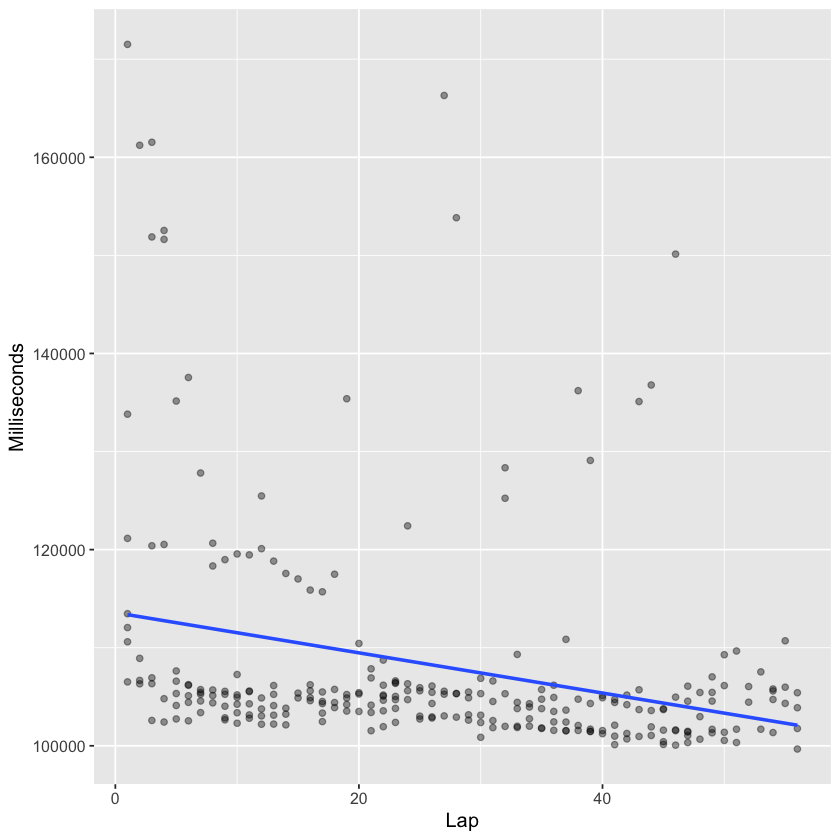

In [23]:
set.seed(2022)

#19.  USA, Austin

fa_austin <- alo_laps %>%
                filter(raceId %in% austin_race_ID) 

fa_austin_clean <- fa_austin %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 

fa_austin_clean_ID <- fa_austin_clean %>%
                        pull(raceId)


### SPLITTING DATA

fa_austin_races <- alo_laps %>%
                    filter(raceId %in% fa_austin_clean_ID)

formulaone_split <- initial_split(fa_austin_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 19

initiate_rmse() 

### GETS PREDICTION

get_austin_prediction()

`geom_smooth()` using formula 'y ~ x'



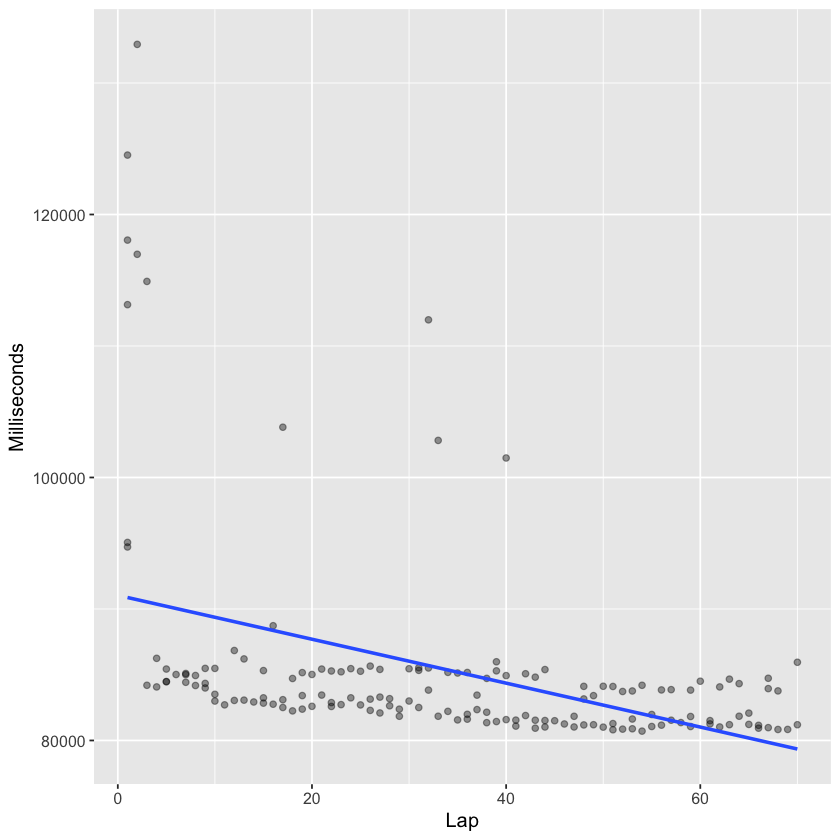

In [24]:
set.seed(2022)

#20. Mexico

fa_mexico <- alo_laps %>%
                filter(raceId %in% mexico_race_ID) 

fa_mexico_clean <- fa_mexico %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 

fa_mexico_clean_ID <- fa_mexico_clean %>%
                        pull(raceId)


### SPLITTING DATA

fa_mexico_races <- alo_laps %>%
                    filter(raceId %in% fa_mexico_clean_ID)

formulaone_split <- initial_split(fa_mexico_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 20

initiate_rmse() 

### GETS PREDICTION

get_mexico_prediction()

`geom_smooth()` using formula 'y ~ x'



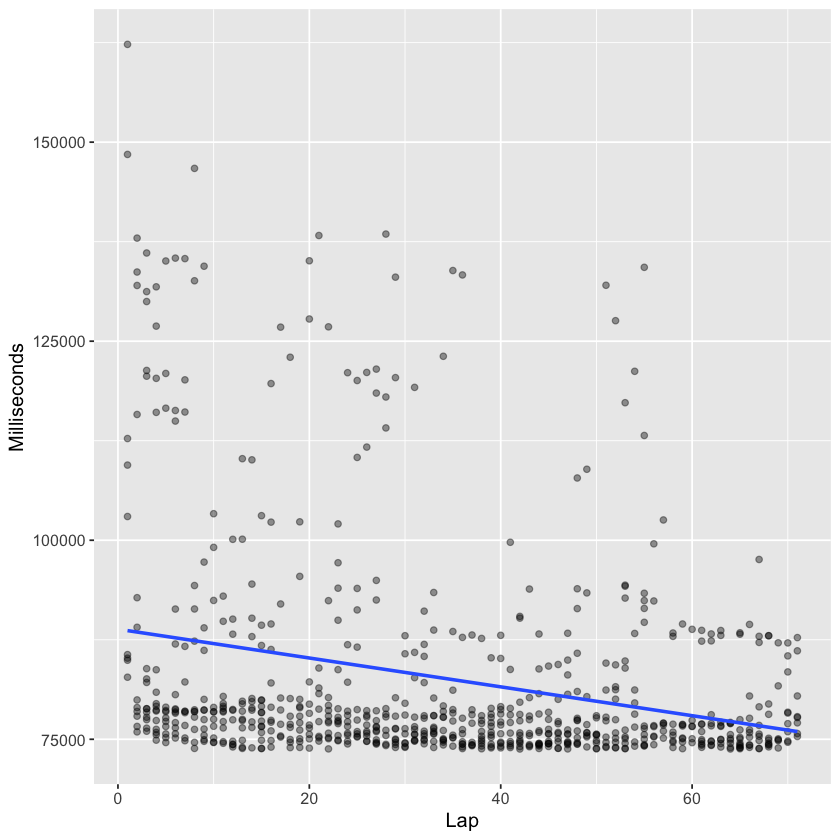

In [25]:
set.seed(2022)

#21. Brazil

fa_brazil <- alo_laps %>%
                filter(raceId %in% brazil_race_ID) 

fa_brazil_clean <- fa_brazil %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 

fa_brazil_clean_ID <- fa_brazil_clean %>%
                        pull(raceId)


### SPLITTING DATA

fa_brazil_races <- alo_laps %>%
                    filter(raceId %in% fa_brazil_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(3:1000)

formulaone_split <- initial_split(fa_brazil_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 21

initiate_rmse() 

### GETS PREDICTION

get_brazil_prediction()

raceId,n
<dbl>,<int>
17,55
355,55
858,55
877,55
897,55
918,55
968,55
988,54
1009,54


`geom_smooth()` using formula 'y ~ x'



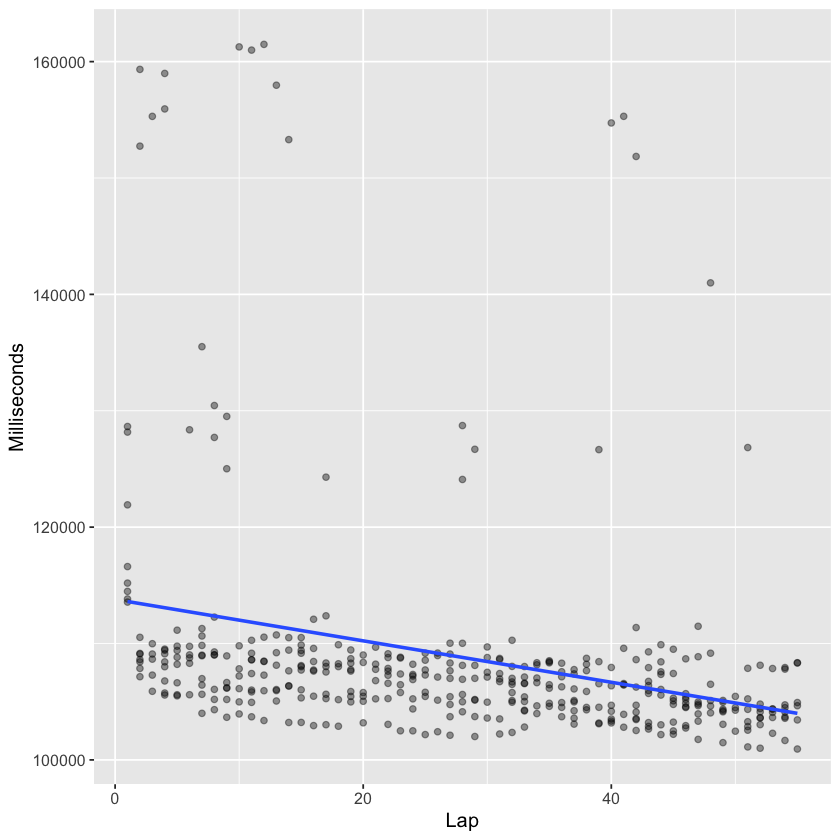

In [28]:
set.seed(2022)

#22. Abu Dhabi

fa_uae <- alo_laps %>%
                filter(raceId %in% uae_race_ID) 

fa_uae_clean <- fa_uae %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
fa_uae_clean
fa_uae_clean_ID <- fa_uae_clean %>%
                        pull(raceId)


### SPLITTING DATA

fa_uae_races <- alo_laps %>%
                    filter(raceId %in% fa_uae_clean_ID)

formulaone_split <- initial_split(fa_uae_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 22

initiate_rmse() 

### GETS PREDICTION

get_uae_prediction()

## Collection

In [29]:
rmse_col
racetime_col

#write_csv(rmse_col, "fa_rmse.csv")

.metric,.estimator,.estimate,Round
<chr>,<chr>,<dbl>,<dbl>
rmse,standard,9055.0236,1
rmse,standard,8235.5515,2
rmse,standard,14146.3071,3
rmse,standard,6911.6385,4
rmse,standard,6271.0679,5
rmse,standard,10491.4593,6
rmse,standard,10413.8588,7
rmse,standard,19490.1458,8
rmse,standard,10955.1674,9


race_time_milliseconds,race_time_mins,race_time_hrs,Round
<dbl>,<dbl>,<dbl>,<dbl>
5725059,95.41764,1.590294,1
5792685,96.54475,1.609079,2
5520983,92.01639,1.533606,3
5529225,92.15375,1.535896,4
5217777,86.96295,1.449383,5
5773027,96.21711,1.603619,6
6604633,110.07721,1.834620,7
6026686,100.44477,1.674079,8
5770197,96.16995,1.602833,9
